In [1]:
# Generates XRD refinement figure with (hkl) reflections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import py_figures_functions as pyf

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

%matplotlib notebook

In [2]:
# import data
xrd_path = "C:/Users/sincl/Documents/MaughanLab/11-BM-B/2022_07_11BM/SRC001-020_Li3ScCl6/SRC001-020_no_antisite/"
hkl_path = "C:/Users/sincl/Documents/MaughanLab/CIFs/"
h_len = 2

# XRD data + refinement
tt, y_obs, sig, y_calc, diff = pyf.import_XRD(1, xrd_path, h_len, True)

# (hkl) reflections
h, k, l, tt_theor = pyf.import_hkl(1, hkl_path)

num_plots = len(tt)
num_hkl = len(h)

Data file 0: SRC001-020_no_adj
Data Tag: 020
hkl file 0: Li3ScCl6_C2m_reflections
hkl Tag: Li3ScCl6


In [3]:
# convert to q
s_wl = 0.459744
p_wl = 1.54

q = pyf.q_dict(tt, s_wl)
q_hkl = pyf.q_dict(tt_theor, p_wl)

In [4]:
# STATIC VARIABLES

# tile
title = r"Li$_{3}$ScCl$_6$"

# instrument
inst_label = "11-BM-B"

# x-axis label
x_label = "Q (\AA" r"$^{-1}$, $\lambda=0.459744$" ")"

# y-axis label
y_label = "Intensity (counts, offset)"

# include substitution fraction labels?
inclSubLabels = False
# is there a calculated refinement curve to add?
inclCalc = True
# include a difference curve?
inclDiff = False
# include legend?
inclLegend = False
# reformat y axis? be sure units on axis labels are correct
inclReformat = False

# don't edit this portion
subLabels = []
if inclSubLabels == True:
    subLabels = pyf.subLabels(num_plots)

hkl_labels, hkl_colors = pyf.hkl_labels(num_hkl)

hkl label for set0: Li$_{3}$ScCl$_6$
Color (blue[1], darkblue[2], purple[3],                       pink[4], hotpink[5], or input hex # [6]): 1


In [5]:
# PLOT VARIABLES

# line colors
initial_color = "#962fbf"
final_color = "#00b8ff"

# offset in y-direction
offset = 1800
# difference curve offset
diff_offset = 100

# axis limits
x_ax = (0.9,6)
y_ax = (-200, 10000)

# title text position
title_pos = (5.3, 9600)

# instrument text position
inst_pos = (5.3, 9200)

# bottom-most substitution label position
bottomSubLabel_pos = (7, -100)

# hkl tick positioning
hkl_height = 200
hkl_width = 0.01
hkl_pos = -100
hkl_label_pos = (x_ax[1] + 0.05 , hkl_pos)

# save a PNG image of graph? 
savePNG = False
# file name
fn = "053A"
# save directory
save_dir = "C:/Users/sincl/Desktop/"

<IPython.core.display.Javascript object>


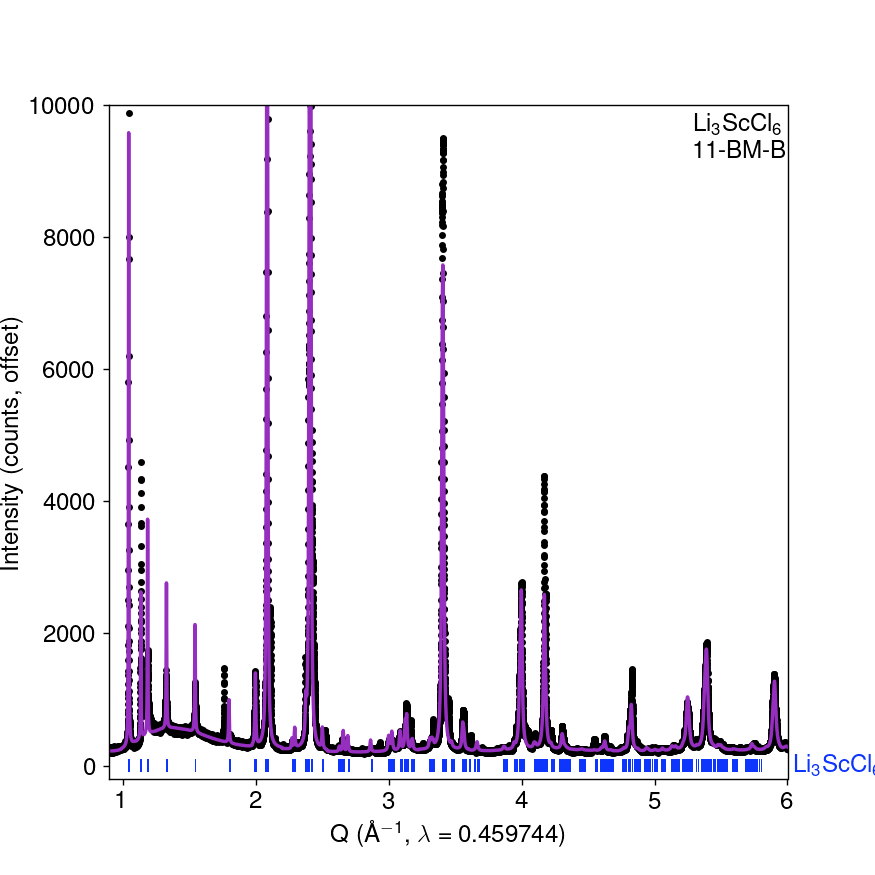

In [6]:
plt.figure(figsize=(7,7))
color_list = pyf.gradient_gen(initial_color, final_color, num_plots)

n = 0
for i in q.keys():
    if inclCalc is False:
        plt.plot(q[i], y_obs[i] + (offset*n), label=i, color=color_list[n].hex)
    
    if inclCalc is True:
        plt.scatter(q[i], y_obs[i] + (offset*n), label="Observed", color="black", marker=".")
        plt.plot(q[i], y_calc[i] + (offset*n), label="Calculated", color=color_list[n].hex, linewidth="2")
        
    if inclDiff is True:
        plt.plot(q[i], diff[i]-diff_offset, label="Difference", color="#BEBEBE", linewidth="0.75")
    
    if inclSubLabels == True:
        plt.text(bottomSubLabel_pos[0], bottomSubLabel_pos[1] + (offset*n), subLabels[n], color=color_list[n].hex)
    n += 1
    
nn = 0
for i in q_hkl.keys():
    plt.bar(q_hkl[i], height=hkl_height, width=hkl_width, bottom=hkl_pos-(hkl_pos*nn), 
            align='center', data=None, color= hkl_colors[nn])
    plt.text(hkl_label_pos[0], hkl_label_pos[1]-(hkl_pos*nn), hkl_labels[nn], color= hkl_colors[nn])
    nn += 1
    
plt.xlim(x_ax[0], x_ax[1])
plt.ylim(y_ax[0], y_ax[1])
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.text(title_pos[0], title_pos[1], title)
plt.text(inst_pos[0], inst_pos[1], inst_label)

if inclReformat == True:
    formatter = FuncFormatter(pyf.reformat_ticks)
    plt.yaxis.set_major_formatter(formatter)
    yticks = plt.yaxis.get_major_ticks()

if inclLegend == True:
    plt.legend()

if savePNG == True:
    plt.savefig(save_dir + fn + ".png", bbox_inches='tight', dpi=1000)